#

In [1]:
import pandas as pd

# Load the CSV file
memespector_file = "/content/drive/MyDrive/2024-01-09-Bauernproteste/2024-01-11-Google-Vision-All.csv"
df = pd.read_csv(memespector_file)

df = df[['Image_BaseName', 'GV_Label_Descriptions']]

# Splitting the 'GV_Label_Descriptions' into individual labels
split_labels = df['GV_Label_Descriptions'].str.split(';').apply(pd.Series, 1).stack()
split_labels.index = split_labels.index.droplevel(-1)  # to line up with df's index
split_labels.name = 'Label'

# Joining the split labels with the original dataframe
df_split = df.join(split_labels)

# Creating a matrix of True/False values for each label per Image_BaseName
matrix = pd.pivot_table(df_split, index='Image_BaseName', columns='Label', aggfunc=lambda x: True, fill_value=False)

# Resetting the column headers to be the label names only
matrix.columns = [col[1] for col in matrix.columns.values]

# Now 'matrix' has a single level of column headers with only the label names


In [2]:
matrix

982 rows × 681 columns

In [3]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Ensuring that 'Image_BaseName' is not part of the matrix to apply PCA
image_base_names = matrix.index  # Saving the image base names for later use
label_matrix = matrix.values  # Convert to numpy array for PCA

# Dimensionality reduction using PCA
# Considering a variance ratio of 0.95 to determine the number of components
pca = PCA(n_components=0.95)
matrix_reduced = pca.fit_transform(label_matrix)

# If needed, you can create a DataFrame from the PCA-reduced matrix and reattach the 'Image_BaseName' column
matrix_reduced_df = pd.DataFrame(matrix_reduced, index=image_base_names)

In [4]:
matrix_reduced_df

982 rows × 242 columns

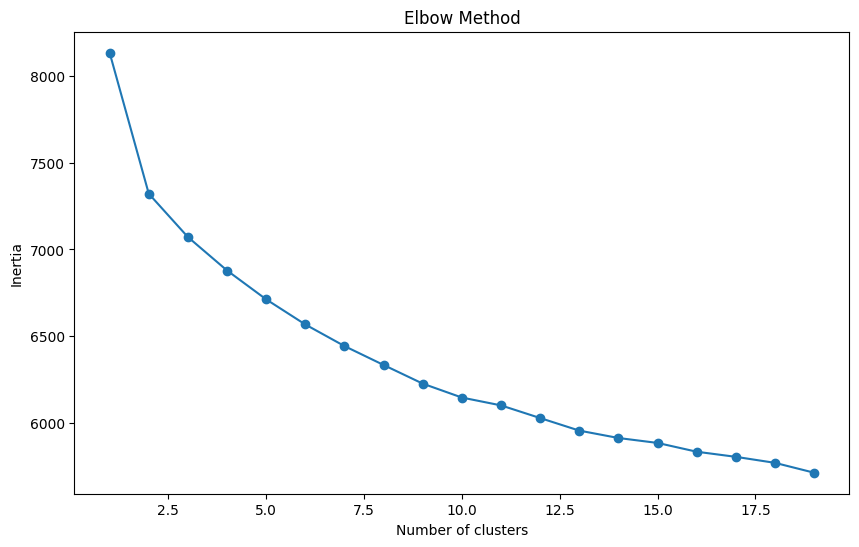

In [5]:
# Elbow method to determine optimal number of clusters
inertia = []
range_values = range(1, 20)  # Checking for 1 to 10 clusters

for i in range_values:
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(matrix_reduced_df)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

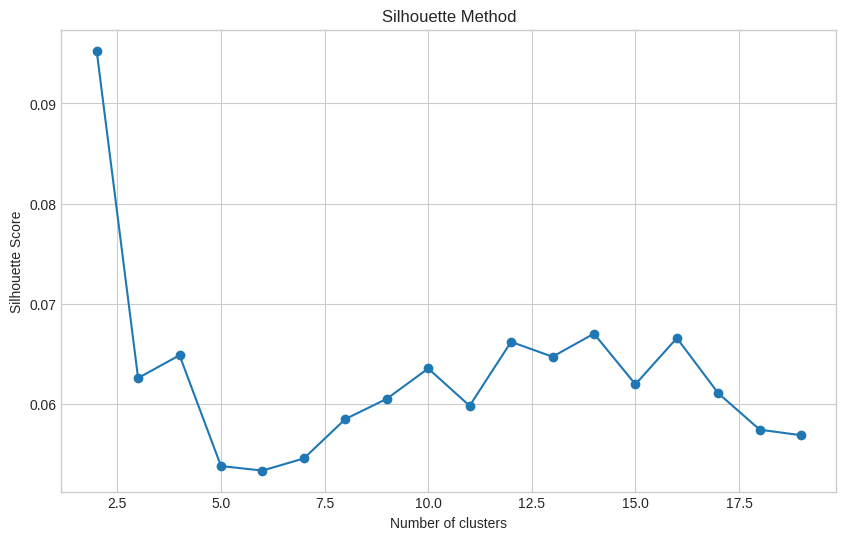

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the range of clusters to try
range_values = range(2, 20)

silhouette_scores = []

# Perform k-means clustering and compute silhouette scores
for i in range_values:
    try:
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
        kmeans.fit(matrix_reduced_df)
        score = silhouette_score(matrix_reduced_df, kmeans.labels_)
        silhouette_scores.append(score)
    except Exception as e:
        print(f"An error occurred with {i} clusters: {e}")

# Plotting the Silhouette Scores
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 6))
    plt.plot(range_values, silhouette_scores, marker='o')
    plt.title('Silhouette Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()


In [8]:
# Final k-means clustering using n clusters
kmeans_final = KMeans(n_clusters=11, n_init=10, random_state=0)
clusters = kmeans_final.fit_predict(matrix_reduced)

# Adding the cluster information back to the original dataframe
matrix['Cluster'] = clusters

In [12]:
# Displaying the first few rows of the dataframe with cluster information
matrix.head()

5 rows × 682 columns

In [ ]:
!unzip /content/drive/MyDrive/2024-01-09-Bauernproteste/2024-01-09-Images-Clean.zip

In [ ]:
# Display the result. See linked notebook for code.